In [43]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
data=pd.read_csv("influence_data.csv",encoding="utf-8")

In [61]:
'''画网络图，追随者指向影响者'''
origin_pop=data[(data['follower_main_genre']=='Pop/Rock')&(data['influencer_main_genre']=='Pop/Rock')][['follower_id','influencer_id','follower_active_start','influencer_active_start']]
pop=origin_pop[origin_pop['follower_active_start']<=1960]
follower=pop['follower_id'].tolist()
influencer=pop['influencer_id'].tolist()
List=[]
for i in range(len(follower)):
    List.append((follower[i],influencer[i]))
G=nx.Graph()
nodes=list(set(follower+influencer))
G.add_nodes_from(nodes)
G.add_edges_from(List)
pos=nx.spring_layout(G)
plt.figure(figsize=(100,100))
nx.draw(G,pos,with_labels=False,font_weight='bold',node_color='Navy',node_size=500)
plt.show()
print(len(nodes))

504


In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as dist
from scipy.cluster.hierarchy import dendrogram, linkage
data=pd.read_csv("TempData/question6/Pop_ZhuChengFen_total.csv",encoding='utf-8')
time=data['time'].tolist()
data_with_out_time=data.drop(columns=['time'])

In [101]:
from sklearn.preprocessing import scale
data_with_out_time=data_with_out_time[['A','B','C']]
data_with_out_time=scale(data_with_out_time)
time_window_length=10
C=[]
window=[]
for i in range(0,87):
    ci=data_with_out_time[i:i+10,:]
    C.append(ci)
    window.append(time[i:i+10])
def euclidean(x, y):
    return (np.sum((x - y)**2))
def make_juli(x,y):
    a=x
    b=y
    juli=0
    for i in range(len(a)):
        for j in range(len(b)):
            juli=euclidean(a[i],b[j])+juli
    juli=np.sqrt(juli/(len(a)*len(b)))
    return juli
dist_matrix = np.mat(np.zeros((len(C), len(C))))
for i in range(len(C)):
    for j in range(len(C)):
        dist_matrix[i,j]=make_juli(C[i],C[j])
        if i==j:
            dist_matrix[i,j]=0
dist_matrix

matrix([[0.        , 4.43397999, 4.17942685, ..., 4.05203253, 4.05527867,
         4.06106845],
        [4.43397999, 0.        , 4.18374625, ..., 4.06435544, 4.06331336,
         4.06365446],
        [4.17942685, 4.18374625, 0.        , ..., 3.82669655, 3.83720287,
         3.85211127],
        ...,
        [4.05203253, 4.06435544, 3.82669655, ..., 0.        , 0.84182849,
         0.89732882],
        [4.05527867, 4.06331336, 3.83720287, ..., 0.84182849, 0.        ,
         0.88080475],
        [4.06106845, 4.06365446, 3.85211127, ..., 0.89732882, 0.88080475,
         0.        ]])

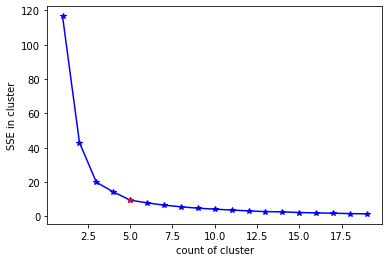

In [102]:
X=[]
for i in range(len(C)):
    X.append(C[i].mean(axis=0))
X=np.array(X)
X.shape
from sklearn.preprocessing import scale
import numpy as np
A=X
from sklearn.cluster import KMeans
TSSE=[]
K=19
for k in range(1,K+1):
    SSE=[]
    md=KMeans(n_clusters=k)
    md.fit(A)
    labels=md.labels_
    centers=md.cluster_centers_
    for label in set(labels):
        SSE.append(np.sum((A[labels==label,:]-centers[label,:])**2))
    TSSE.append(np.sum(SSE))
plt.figure(2)
plt.plot(range(1,K+1),TSSE,'b*-')
plt.plot(5,TSSE[4],'r*')
plt.xlabel("count of cluster")
plt.ylabel("SSE in cluster")
plt.show()

In [116]:
def fihser_YouxuPanbie(X,k):
    global sampleD, loss
    import numpy as np
    import jieba
    def normalizeRows(xx):  #
        '''
        将矩阵正规化
        x:ndarr
        return:ndarr
        '''
        norm = []

        for i in range(xx.shape[0]):
            mean = np.mean(xx[i])
            std = np.std(xx[i])
            norm.append(1.0 * (xx[i] - mean) / std)
        return (np.array(norm))

    def sampleD(x):
        '''
        计算离差平方和来表示直径
        x:ndarr
        return:number
        '''
        meanVector = np.mean(x, axis=0)
        D = 0
        for i in x:
            D += (meanVector - i) @ (meanVector - i).T
        return D

    def loss(x, interval):
        '''
        x:the normalized matrix,ndarr
        interval:all the classes interval,2 d list
        return:the loss,number
        '''
        loss = 0
        for button, top in interval:
            loss += sampleD(x[button:top])
        #         print(button,top,sampleD(x[button:top]))
        return loss

    class FOP():
        '''
        fisher最优分割'''

        def __init__(self, x, n_classes=4):
            self.LP = np.zeros((x.shape[0], n_classes + 1))  # 可以提前 把我已经训练好的数据放到这
            self.PATH = np.zeros((x.shape[0], n_classes + 1)).tolist()  # 可以提前 把我已经训练好的数据放到这,在../data中

        def FOP_2(self, xx, n_num, n_classes=2, intv=True):
            '''
            find the 2 classes Fisher optimal partition
            xx:the normalized matrix ndarr
            n_num:the length of data
            n_classes:
            intv:decide return the interval or not
            return:the best one classes interval list
                    the min loss,number
            '''
            n_num = n_num - 1

            if self.LP[n_num, n_classes] != 0:  # def a zeros Lp matrix

                return self.PATH[n_num][n_classes], self.LP[n_num, n_classes]

            #     x=normalizeRows(x)
            x = xx.copy()
            x = x[0:n_num + 1]
            length = x.shape[0]
            minLoss = np.inf
            bestInterval = []
            for i in (range(1, length)):
                interval = [[0, i], [i, length]]
                tempLoss = loss(x, interval)
                if tempLoss < minLoss:
                    #             print('find a better one')
                    minLoss = tempLoss
                    bestInterval = interval
            #     print('best',minLoss)
            self.LP[n_num, n_classes] = minLoss
            self.PATH[n_num][n_classes] = bestInterval  # 将路径和loss存储
            if intv:
                return bestInterval, minLoss
            else:
                return minLoss

        def FOP_3(self, xx, n_num, n_classes=3, intv=True):
            '''
            find the 3 classes Fisher optimal partition
            x:the normalized matrix ndarr
            intv:return interval or not
            return:the best one classes interval list
                    the min loss,number
            '''
            n_num = n_num - 1
            if self.LP[n_num, n_classes] != 0:  # def a zeros Lp matrix
                return self.PATH[n_num][n_classes], self.LP[n_num, n_classes]
            x = xx.copy()
            x = x[0:n_num + 1]
            length = x.shape[0]
            minLoss = np.inf
            bestInterval = []
            for i in (range(3 - 1, length)):
                #             print('dangla')
                #             print('I',end='')
                interval = [[0, i], [i, length]]
                #             print(interval)
                _, minLoss_old = self.FOP_2(x, i)
                tempLoss = loss(x, [interval[1]]) + minLoss_old
                #         print(loss(x,[interval[1]]))
                #         print(minLoss_old)
                if tempLoss < minLoss:
                    #             print('find a better one')
                    minLoss = tempLoss
                    bestInterval = interval
                    #     print('best',minLoss)
                    bestInterval[0] = _
            self.LP[n_num, n_classes] = minLoss
            self.PATH[n_num][n_classes] = bestInterval

            #         if n_num > 400 or n_num %10 == 0:
            #             print(n_num,':',bestInterval,end=':')
            if intv:
                return bestInterval, minLoss
            else:
                return minLoss

        def FOP_N(self, xx, n_num, n_classes, intv=True):
            '''
            find the n classes Fisher optimal partition,the n > 2
            x:the normalized matrix ndarr
            intv:return interval or not
            return:the best one classes interval list
                    the min loss,number
            '''
            n_num = n_num - 1
            if self.LP[n_num, n_classes] != 0:  # def a zeros Lp matrix
                return self.PATH[n_num][n_classes], self.LP[n_num, n_classes]
            x = xx.copy()
            x = x[0:n_num + 1]
            length = x.shape[0]
            minLoss = np.inf
            bestInterval = []
            for i in (range(n_classes - 1, length)):
                #             print('dangla')
                # print('I', end='')
                interval = [[0, i], [i, length]]
                #             print(interval)
                if n_classes >= 5:
                    _, minLoss_old = eval('self.FOP_N(x,i,{})'.format(n_classes - 1))
                else:
                    _, minLoss_old = eval('self.FOP_{}(x,i)'.format(n_classes - 1))
                tempLoss = loss(x, [interval[1]]) + minLoss_old
                #         print(loss(x,[interval[1]]))
                #         print(minLoss_old)
                if tempLoss < minLoss:
                    #             print('find a better one')
                    minLoss = tempLoss
                    bestInterval = interval
                    #     print('best',minLoss)
                    bestInterval[0] = _
            self.LP[n_num, n_classes] = minLoss
            self.PATH[n_num][n_classes] = bestInterval

            if n_num > 400 or n_num % 10 == 0:
                yyyyyyyy = 0
                # print(n_num, ':', bestInterval, end=':')
            if intv:
                return bestInterval, minLoss
            else:
                return minLoss
    x=X
    N_CLASS = k
    fop = FOP(x, n_classes=N_CLASS)
    return(fop.FOP_N(x, x.shape[0], n_classes=N_CLASS, intv=True))


fisher,loss=fihser_YouxuPanbie(A,3)

In [104]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as dist
from scipy.cluster.hierarchy import dendrogram, linkage
model = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='average')
clustering2 = model.fit(dist_matrix)
centers=clustering2
print("自定义距离矩阵聚类方式：")
print("每个数据所属的簇编号：", clustering2.labels_)

自定义距离矩阵聚类方式：
每个数据所属的簇编号： [2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [118]:
fish=[]
for i in range(0,24):
    fish.append(0)
for i in range(24,45):
    fish.append(1)
for i in range(45,87):
    fish.append(2)

In [119]:
window=np.array(window)
window=pd.DataFrame(window)
window['cluster']=list(clustering2.labels_)
window['fisher']=fish

In [120]:
window.to_csv("TempData/question6/pop_time_window.csv",encoding="utf-8",index=False)

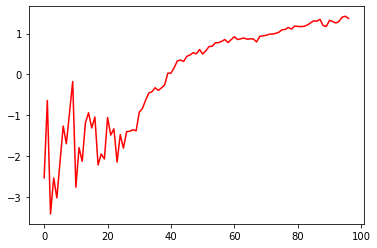

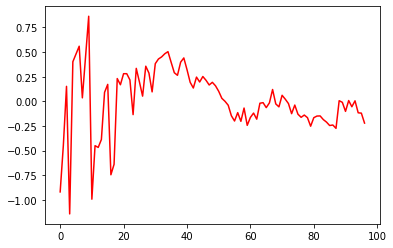

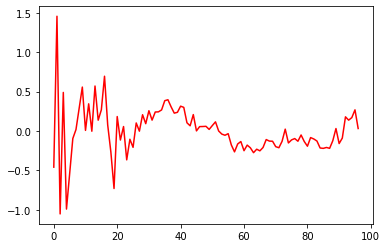

In [122]:
import pandas as pd
plot_data=pd.read_csv('TempData/question6/Pop_ZhuChengFen_total.csv',encoding='utf-8')
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(plot_data['A'].to_list(),'r-')
plt.show()
plt.figure(2)
plt.plot(plot_data['B'].to_list(),'r-')
plt.show()
plt.figure(3)
plt.plot(plot_data['C'].to_list(),'r-')
plt.show()